In [95]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


## Get data

In [96]:
# User selections
user_choices = pd.read_csv("../../data/output/user_selection_recommender_beta.csv", )
df_pueblos = pd.read_csv("../../data/output/pueblos_recommender_beta.csv")

In [97]:
user_choices

,cmun,municipality,transf_cat__koppen_climate_Bsh,transf_cat__koppen_climate_Cfa,transf_cat__koppen_climate_Cfb,transf_cat__koppen_climate_Csa,transf_cat__koppen_climate_Csb,scaled__connectivity_score,scaled__economy_score,scaled__economy_score_area,scaled__hospital_distance_score,scaled__school_distance_score,scaled__hospital_score_area,scaled__school_score_area,scaled__train_distance_score,scaled__airport_distance_score,scaled__transport_score
2726,47188,Vega de Valdetronco,0.0,0.0,0.0,0.0,1.0,-0.028095,-0.397119,-0.337155,-0.883675,-0.260867,-0.883675,-0.260867,-0.405832,1.424322,0.303148
17,33001,Allande,0.0,0.0,1.0,0.0,0.0,-1.054391,0.415596,-0.163495,1.062733,0.721064,1.062733,0.721064,-1.053649,-0.336392,-0.988038
98,20046,Irura,0.0,0.0,1.0,0.0,0.0,1.033871,1.323924,0.658019,2.619860,0.721064,2.619860,0.721064,-0.729741,0.250512,-0.471564
403,27003,Antas de Ulla,0.0,0.0,0.0,0.0,1.0,-0.308583,0.578139,1.207565,-0.494394,0.721064,-0.494394,0.721064,-0.729741,0.250512,-0.471564
4705,5163,Navaluenga,0.0,0.0,0.0,0.0,1.0,-0.229139,1.170943,0.171576,-0.494394,0.721064,-0.494394,0.721064,-0.729741,-0.336392,-0.729801
5503,45092,Marjaliza,0.0,0.0,0.0,1.0,0.0,0.662588,-0.397119,0.411317,-0.883675,-3.206659,-0.883675,-3.206659,-1.053649,-0.336392,-0.988038


In [98]:
df_pueblos

,cmun,municipality,transf_cat__koppen_climate_Bsh,transf_cat__koppen_climate_Cfa,transf_cat__koppen_climate_Cfb,transf_cat__koppen_climate_Csa,transf_cat__koppen_climate_Csb,scaled__connectivity_score,scaled__economy_score,scaled__economy_score_area,scaled__hospital_distance_score,scaled__school_distance_score,scaled__hospital_score_area,scaled__school_score_area,scaled__train_distance_score,scaled__airport_distance_score,scaled__transport_score
0,48067,Muxika,0.0,0.0,1.0,0.0,0.0,0.224831,0.386912,1.185980,1.062733,0.721064,1.062733,0.721064,-1.053649,1.424322,-0.213326
1,15064,Paderne,0.0,0.0,0.0,0.0,1.0,0.639890,0.731121,0.865604,0.284170,0.721064,0.284170,0.721064,1.861526,1.424322,2.110809
2,15039,Irixoa,0.0,0.0,1.0,0.0,0.0,-0.021610,-0.397119,0.279576,-0.105112,0.721064,-0.105112,0.721064,0.565893,1.424322,1.077860
3,48062,Mendata,0.0,0.0,1.0,0.0,0.0,0.299412,-0.397119,0.994147,0.284170,0.721064,0.284170,0.721064,-1.053649,1.424322,-0.213326
4,48905,Zamudio,0.0,0.0,1.0,0.0,0.0,0.952805,6.343633,2.815453,2.619860,0.721064,2.619860,0.721064,-1.053649,3.771941,0.819623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,29057,Genalguacil,0.0,0.0,0.0,1.0,0.0,0.125931,-0.397119,1.096759,1.062733,0.721064,1.062733,0.721064,0.565893,0.250512,0.561385
6666,11025,Paterna de Rivera,0.0,0.0,0.0,1.0,0.0,1.029007,2.413918,7.126529,-0.494394,0.721064,-0.494394,0.721064,-1.053649,0.250512,-0.729801
6667,29056,Gaucín,0.0,0.0,0.0,1.0,0.0,0.578280,0.511210,1.842909,0.284170,0.721064,0.284170,0.721064,1.213709,0.250512,1.077860
6668,11001,Alcalá de los Gazules,0.0,0.0,0.0,1.0,0.0,0.552338,2.413918,3.239257,-0.883675,0.721064,-0.883675,0.721064,-0.729741,0.250512,-0.471564


In [99]:
df_pueblos.columns

Index(['cmun', 'municipality', 'transf_cat__koppen_climate_Bsh',
       'transf_cat__koppen_climate_Cfa', 'transf_cat__koppen_climate_Cfb',
       'transf_cat__koppen_climate_Csa', 'transf_cat__koppen_climate_Csb',
       'scaled__connectivity_score', 'scaled__economy_score',
       'scaled__economy_score_area', 'scaled__hospital_distance_score',
       'scaled__school_distance_score', 'scaled__hospital_score_area',
       'scaled__school_score_area', 'scaled__train_distance_score',
       'scaled__airport_distance_score', 'scaled__transport_score'],
      dtype='object')

## Getting user preferences from the different scores: 

In [100]:
# Compute frequencies of each feature in user selections
feature_weights_scores = {}
columns_scores = ['scaled__connectivity_score', 'scaled__economy_score',
       'scaled__economy_score_area', 'scaled__hospital_distance_score',
       'scaled__school_distance_score', 'scaled__hospital_score_area',
       'scaled__school_score_area', 'scaled__train_distance_score',
       'scaled__airport_distance_score', 'scaled__transport_score']



for feature in user_choices[columns_scores]:
    # Calculate the mean for user selections
    user_median = user_choices[feature].median()

    # Calculate the mean for the entire dataset
    global_median = df_pueblos[feature].median()

    # Calculate absolute difference to capture deviation from the norm
    diff = abs(user_median - global_median)

    # Store the difference as the feature weight
    feature_weights_scores[feature] = diff

In [101]:
# Normalize weights to sum to 1
total_diff = sum(feature_weights_scores.values())

In [102]:
total_diff

2.719381720044968

In [103]:
feature_weights_scores = {k: v / total_diff for k, v in feature_weights_scores.items()}

In [104]:
# Display the result
print("User Feature Preferences (Weights):")
for feature, weight in feature_weights_scores.items():
    print(f"{feature}: {round(weight, 3)}")

User Feature Preferences (Weights):
scaled__connectivity_score: 0.049
scaled__economy_score: 0.329
scaled__economy_score_area: 0.253
scaled__hospital_distance_score: 0.0
scaled__school_distance_score: 0.0
scaled__hospital_score_area: 0.0
scaled__school_score_area: 0.0
scaled__train_distance_score: 0.119
scaled__airport_distance_score: 0.108
scaled__transport_score: 0.142


## Getting user preferences for one-hot-encoded features

In [105]:
columns_encoded= ['transf_cat__koppen_climate_Bsh', 'transf_cat__koppen_climate_Cfa',
                   'transf_cat__koppen_climate_Cfb', 'transf_cat__koppen_climate_Csa',
                   'transf_cat__koppen_climate_Csb']

# Calculate frequency of each of the types
feature_weights_encoded = user_choices[columns_encoded].sum()

# Identify the most liked climate (highest frequency)
max_value = feature_weights_encoded.max()

# Set the most liked climate to 1, others to 0
feature_weights_encoded = feature_weights_encoded.apply(lambda x: 1 if x == max_value else 0)

feature_weights_encoded

# Display the results
print("Preferred Climate:")
print(feature_weights_encoded) 


Preferred Climate:
transf_cat__koppen_climate_Bsh    0
transf_cat__koppen_climate_Cfa    0
transf_cat__koppen_climate_Cfb    0
transf_cat__koppen_climate_Csa    0
transf_cat__koppen_climate_Csb    1
dtype: int64


## Create User preferences vector

In [106]:
feature_weights_encoded_series = pd.Series(feature_weights_encoded)
feature_weights_scores_series = pd.Series(feature_weights_scores)
user_preferences_vector = pd.concat([feature_weights_encoded_series, feature_weights_scores_series], axis=0)
user_preferences_df = pd.DataFrame([user_preferences_vector])

In [107]:
user_preferences_df

,transf_cat__koppen_climate_Bsh,transf_cat__koppen_climate_Cfa,transf_cat__koppen_climate_Cfb,transf_cat__koppen_climate_Csa,transf_cat__koppen_climate_Csb,scaled__connectivity_score,scaled__economy_score,scaled__economy_score_area,scaled__hospital_distance_score,scaled__school_distance_score,scaled__hospital_score_area,scaled__school_score_area,scaled__train_distance_score,scaled__airport_distance_score,scaled__transport_score
0,0.0,0.0,0.0,0.0,1.0,0.048889,0.328746,0.2529,0.0,0.0,0.0,0.0,0.119111,0.107911,0.142443


## Recommendation based on Cosin Similarity

In [108]:
similarity_scores = cosine_similarity(df_pueblos.drop(["cmun", "municipality"], axis=1), user_preferences_df)

In [109]:
df_pueblos['similarity'] = similarity_scores

In [110]:
recommendations = df_pueblos.sort_values(by='similarity', ascending=False)

In [111]:
recommendations[['cmun', 'municipality', 'similarity']].head(5)

,cmun,municipality,similarity
2756,47173,Traspinedo,0.696651
4225,40146,Navas de San Antonio,0.669336
1314,32043,Maceda,0.661542
305,27901,Baralla,0.658106
1501,32068,Ramirás,0.657423


## Recommendation based on KNN

In [112]:
df_pueblos = df_pueblos.drop("similarity", axis = 1)

In [113]:
# Prepare KNN with Hamming distance for binary data
knn = NearestNeighbors(n_neighbors=5, metric='hamming')
knn.fit(df_pueblos.drop(['cmun', 'municipality'], axis = 1))

NearestNeighbors(metric='hamming')

In [114]:
user_preferences_df

,transf_cat__koppen_climate_Bsh,transf_cat__koppen_climate_Cfa,transf_cat__koppen_climate_Cfb,transf_cat__koppen_climate_Csa,transf_cat__koppen_climate_Csb,scaled__connectivity_score,scaled__economy_score,scaled__economy_score_area,scaled__hospital_distance_score,scaled__school_distance_score,scaled__hospital_score_area,scaled__school_score_area,scaled__train_distance_score,scaled__airport_distance_score,scaled__transport_score
0,0.0,0.0,0.0,0.0,1.0,0.048889,0.328746,0.2529,0.0,0.0,0.0,0.0,0.119111,0.107911,0.142443


In [115]:
# Calculate distances for the user-selected towns
distances, indices = knn.kneighbors(user_preferences_df)

In [116]:
# recommendations = df_pueblos.iloc[indices.flatten()]

In [117]:
distances

array([[0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667]])

In [118]:
# Get the town names and distances
recommendations = df_pueblos.iloc[indices[0]].copy()  # [0] to get the first row of indices
recommendations['similarity'] = 1 - distances[0]  # Higher score means closer match

In [119]:
recommendations = recommendations.sort_values(by='similarity', ascending=False)

In [120]:
# Display Recommendations
print("Recommended Towns:")
recommendations[['municipality', 'similarity']]

Recommended Towns:


,municipality,similarity
3197,Retortillo de Soria,0.333333
2960,Aldeanueva de la Serrezuela,0.333333
3024,Carrascosa de Abajo,0.333333
373,"Altos, Los",0.333333
576,Pino del Río,0.333333


### KNN and cosine, but using the user preferences matrix instead of a preference vector

In [121]:
# Initialize the KNN model (using Cosine Similarity for better results with mixed data)
knn = NearestNeighbors(n_neighbors=3, metric='cosine') 
knn.fit(df_pueblos.drop(["cmun", "municipality"], axis=1))  # Fit on the complete town dataset

# Use the complete user choices matrix to find similar towns
distances, indices = knn.kneighbors(user_choices.drop(["cmun", "municipality"], axis=1)) 

# Extract recommended towns
recommendations = df_pueblos.iloc[indices.flatten()].copy()
recommendations['similarity'] = 1 - distances.flatten()  # Convert distance to similarity

# Display recommendations
print("\n🏆 Recommended Pueblos Based on User Selections:")
recommendations[["cmun", "municipality", "similarity"]].sort_values("similarity", ascending=False).head(10)



🏆 Recommended Pueblos Based on User Selections:


,cmun,municipality,similarity
2726,47188,Vega de Valdetronco,1.000000
98,20046,Irura,1.000000
5503,45092,Marjaliza,1.000000
4705,5163,Navaluenga,1.000000
403,27003,Antas de Ulla,1.000000
17,33001,Allande,1.000000
549,31257,Villatuerta,0.994991
23,20901,Mendaro,0.993336
5418,45151,San Martín de Montalbán,0.989005
6052,13080,Solana del Pino,0.987397


## Matrix Factorization: Singular Value Decomposition (SVD)

In [122]:
df_pueblos = df_pueblos.drop("similarity", axis=1)

KeyError: "['similarity'] not found in axis"

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Convert user choices into a sparse matrix format
sparse_matrix = user_choices.drop(["cmun", "municipality"],axis=1).values  # Matrix of shape (users, features)

# Apply Truncated SVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=3)
user_latent_features = svd.fit_transform(sparse_matrix)


A **sparse matrix** is a data structure that efficiently stores mostly zero values, reducing memory usage and speeding up computations. In machine learning and recommendation systems, sparse matrices are commonly used to handle high-dimensional data where most values are zero (e.g., one-hot encoded categorical variables, recommendation interactions, etc.).
If you have a large dataset with many categorical one-hot encoded features, most entries will be 0. Using a dense matrix (storing all values explicitly) wastes memory. Instead, a sparse matrix only stores the non-zero values, making operations faster.

The **number of components** (n_components=3) in TruncatedSVD (Singular Value Decomposition) determines how many latent features (hidden patterns) we retain when reducing the dimensionality of the data.:
- It means that SVD will reduce the dataset to 3 latent dimensions (features).
- Instead of keeping all original features, it finds the top 3 most important patterns in the data.

Optimal number of n_components:
The choice of n_components depends on how much variance (information) you want to keep.

**Choosing a Small n_components (like 3)**

- Helps with dimensionality reduction.
- Speeds up computations.
- Might lose some details.

**Choosing a Large n_components**

- Retains more original data information.
- But can increase computational cost.

#### Calculate the optimal number of n_components:

In [ ]:
# Example sparse matrix (this would be your user-item or town-feature matrix)

# Apply SVD with many components to check variance
svd = TruncatedSVD(n_components=5)
svd.fit(user_choices.drop(["cmun", "municipality"],axis=1))

# Check explained variance per component
explained_variance = svd.explained_variance_ratio_

# Check cumulative variance (how much info we keep)
cumulative_variance = np.cumsum(explained_variance)

print("Variance explained by each component:", explained_variance)
print("Cumulative variance:", cumulative_variance)

Variance explained by each component: [0.60639438 0.23387453 0.04674654 0.0608799  0.0391211 ]
Cumulative variance: [0.60639438 0.84026891 0.88701545 0.94789535 0.98701644]


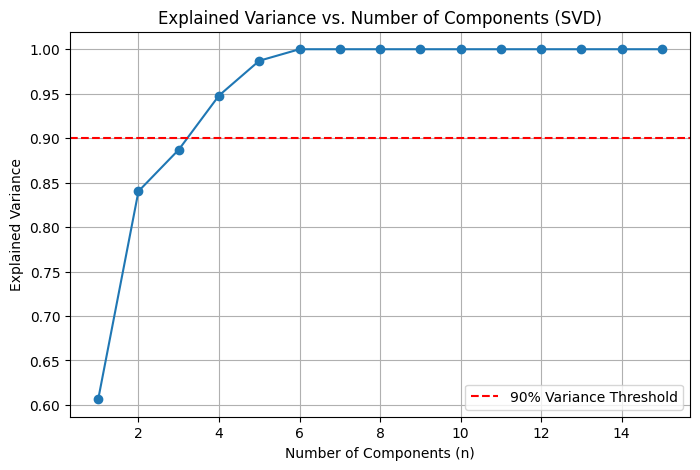

In [ ]:
user_choices_numeric = user_choices.drop(columns=['cmun', 'municipality'])  

n_components_list = range(1, min(50, user_choices_numeric.shape[1]) + 1) 
explained_variance = []

for n in n_components_list:
    svd = TruncatedSVD(n_components=n)
    svd.fit(user_choices_numeric)
    explained_variance.append(sum(svd.explained_variance_ratio_))  

# ✅ Step 4: Plot Explained Variance vs. Number of Components
plt.figure(figsize=(8, 5))
plt.plot(n_components_list, explained_variance, marker='o', linestyle='-')
plt.xlabel("Number of Components (n)")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Number of Components (SVD)")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Threshold")  # Add 90% threshold line
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Apply Truncated SVD (Dimensionality Reduction)
svd = TruncatedSVD(n_components=4)
user_latent_features = svd.fit_transform(sparse_matrix)

In [123]:
# Transform town data into the same latent space
pueblos_latent_features = svd.transform(df_pueblos.drop(["cmun", "municipality"],axis=1).values)

# Compute similarities
similarities = cosine_similarity(user_latent_features, pueblos_latent_features)

# Get top recommended towns
df_pueblos['similarity'] = similarities.mean(axis=0)
df_towns = df_pueblos.sort_values(by='similarity', ascending=False)

# Show recommendations
print("\n🏆 Recommended Towns Using SVD:")
df_pueblos[["cmun", "municipality", "similarity"]].sort_values("similarity", ascending=False).head(5)



🏆 Recommended Towns Using SVD:


,cmun,municipality,similarity
2727,47114,Peñafiel,0.472200
6388,4062,Macael,0.470751
279,9209,Medina de Pomar,0.470511
394,34080,Guardo,0.468987
6165,6085,Monesterio,0.468983
